In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

$$\text{MHO Frequency: } \hbar \omega_{0}= \frac{41}{A^{1/3}} \Biggl( 1 \pm \frac{N-Z}{3A} \Biggr) \hspace{0.5em} \text{MeV}$$
$$ \text{Spin-Orbit term proportional to: }V_{ls} = \frac{g}{2m^2 c^2 } \frac{1}{r} \frac{dV}{dr} \vec{l} \cdot \vec{s}$$
$$ \text{Harmonic Oscillator spin-orbit term: }V_{ls} = -2\kappa \hbar \omega_0 \vec{l}\cdot\vec{s} $$
$$ $$
$$ \text{Modified HO adds l-squared term: }V_{ll} = -\kappa \mu \hbar \omega_0 \Biggl( \vec{l}^2 - \langle \vec{l}^2 \rangle _N \Biggr) $$
$$ \text{Where } \langle \vec{l^2} \rangle_N = N ( N + 3 ) /2$$

$$ $$

$$ \text{MHO single-particle energies: } \epsilon(Nlj) = \hbar\omega_0 \Biggl[ N + \frac{3}{2} - \kappa \text{L} - \mu' \Biggl( l (l+1) - \frac{N(N+3)}{2} \Biggr) \Biggr]$$
$$ \text{Where L } = l \text{ if } j = l + \frac{1}{2} \text{, or L } = -(l+1) \text{ if } j = l - \frac{1}{2}$$

In [2]:
df = pd.read_csv('data.csv')
dfN = df[df['particle'] == 'n']
dfP = df[df['particle'] == 'p']
print(df)

      A  Neutrons particle   Egap
0   208       126        p   4.21
1   208       126        n   3.43
2   132        82        p   6.03
3   132        82        n   4.84
4    56        28        p   6.48
5    56        28        n   6.39
6    48        28        p   6.75
7    48        28        n   5.40
8    40        20        p   7.24
9    40        20        n   7.28
10   16         8        p  11.53
11   16         8        n  11.52


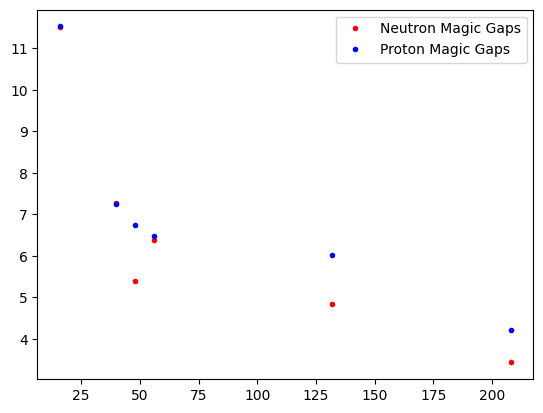

In [3]:
plt.figure(1)
plt.plot(dfN['A'],dfN['Egap'],'r.',label='Neutron Magic Gaps')
plt.plot(dfP['A'],dfP['Egap'],'b.',label='Proton Magic Gaps')
plt.legend()
plt.show()

In [40]:
def paramspace(n):
    spacearray = []
    for i in range(0,n):
        if int(i)%2 == 0:
            fac = 0
        else:
            fac = 1
        for j in range(0,1+int((i)/2)):
            l = 2*j + fac
            if l == 0:
                print((i,l,.5))
                spacearray.append((i,l,.5))
            else:
                print((i,l,l+.5))
                print((i,l,l-.5))
                spacearray.append((i,l,l+.5))
                spacearray.append((i,l,l-.5))
    return spacearray
space = paramspace(8)

(0, 0, 0.5)
(1, 1, 1.5)
(1, 1, 0.5)
(2, 0, 0.5)
(2, 2, 2.5)
(2, 2, 1.5)
(3, 1, 1.5)
(3, 1, 0.5)
(3, 3, 3.5)
(3, 3, 2.5)
(4, 0, 0.5)
(4, 2, 2.5)
(4, 2, 1.5)
(4, 4, 4.5)
(4, 4, 3.5)
(5, 1, 1.5)
(5, 1, 0.5)
(5, 3, 3.5)
(5, 3, 2.5)
(5, 5, 5.5)
(5, 5, 4.5)
(6, 0, 0.5)
(6, 2, 2.5)
(6, 2, 1.5)
(6, 4, 4.5)
(6, 4, 3.5)
(6, 6, 6.5)
(6, 6, 5.5)
(7, 1, 1.5)
(7, 1, 0.5)
(7, 3, 3.5)
(7, 3, 2.5)
(7, 5, 5.5)
(7, 5, 4.5)
(7, 7, 7.5)
(7, 7, 6.5)


In [160]:
def MHOfreq(A,N,particle):
    Z = A-N
    if particle=='p':
        sign = -1
    else:
        sign = 1
    hw0 = (41./(A)**(1/3))*(1+sign*(N-Z)/(3*A))
    return hw0

def energy(n,L,j,params):
    el = float(L)
    if j-el > 0:
        l = el
    else:
        l = -(el+1)
    k,mu = params
#    freq = MHOfreq(A,N,particle)
#    ener = freq*
    ener = (n + 1.5 - k*l - k*mu*(el*(el+1)-(n*(n+3))/2))
    return ener

def enersorter(space,params):
    Elist = np.zeros(len(space))
    for i in range(0,len(space)):
        Elist[i] = energy(*space[i],params)
    df = pd.DataFrame({'N':[row[0] for row in space],
                       'l':[row[1] for row in space],
                       'j':[row[2] for row in space],
                       'ener':Elist})
    return df.sort_values(by='ener')
sorted_df=enersorter(space,(.06,.04))
#print(sorted_df)
def magic_gap_finder(sorted_df,num):
    tally = 0
    ind = 0
    while tally != num:
        j = sorted_df.iloc[ind]['j']
        ind += 1
        tally += int(2*j) + 1
        print(tally)
        if tally > num:
            break
    return ind

print(magic_gap_finder(enersorter(space,pparams),82))

2
6
8
14
16
20
28
32
34
40
50
56
58
62
70
82
16


In [161]:
def chi2(params,df,Particle,space):
    if Particle == 0:
        add = int(0)
    else:
        add = int(1)
    Space = enersorter(space,params)
    Nsum = 0.
    for i in range(0,int(len(df)/2)):
        args = df.iloc[i+add]
        if add == 0:
            Num = args[0]-args[1]
        else:
            Num = args[1]
        magic = magic_gap_finder(Space,Num)
#        print('BABA')
#        print(Num)
#        print('BABA')
#        print(Nsum)
        print(args[3])
        E0 = args[3]
        Eum = MHOfreq(*args[:-1])*(Space.iloc[magic][3])
        Elm = MHOfreq(*args[:-1])*Space.iloc[magic-1][3]
#        print(MHOfreq(*args[:-1])*(Space.iloc[magic][3]))
#        print(MHOfreq(*args[:-1])*Space.iloc[magic-1][3])
#        Nsum = Nsum + (args[3]-MHOfreq(*args[:-1])*(Space.iloc[magic][3]-Space.iloc[magic-1][3]))#(energy(magic_gap_finder(Space,Num),params)-energy(magic_gap_finder(Space,Num)-1,params))**2)
        Nsum += (E0-(Eum-Elm))**2 
    return Nsum

print(chi2(Nfit.x,df,1,space))

2
6
8
14
18
20
28
34
38
40
50
58
64
76
80
82
96
106
114
120
124
140
3.43
2
6
8
14
18
20
28
34
38
40
50
58
64
76
80
82
6.03
2
6
8
14
18
20
28
34
38
40
50
58
64
76
80
82
4.84
2
6
8
14
18
20
28
6.48
2
6
8
14
18
20
28
6.39
2
6
8
14
18
20
28
6.75
15.657310108616379


In [162]:
pparams = (0.06,0.04)
bounds = ((0,np.inf),(0,np.inf))
nparams = (0.06,0.02)
Pfit = minimize(chi2,pparams,(df,0,space),method='Nelder-Mead',bounds=bounds)
Nfit = minimize(chi2,nparams,(df,1,space),method='Nelder-Mead',bounds=bounds)

2
6
8
14
16
20
28
32
34
40
50
56
58
62
70
82
4.21
2
6
8
14
16
20
28
32
34
40
50
56
58
62
70
82
3.43
2
6
8
14
16
20
28
32
34
40
50
6.03
2
6
8
14
16
20
28
32
34
40
50
4.84
2
6
8
14
16
20
28
6.48
2
6
8
14
16
20
28
6.39
2
6
8
14
16
20
28
32
34
40
50
56
58
62
70
82
4.21
2
6
8
14
16
20
28
32
34
40
50
56
58
62
70
82
3.43
2
6
8
14
16
20
28
32
34
40
50
6.03
2
6
8
14
16
20
28
32
34
40
50
4.84
2
6
8
14
16
20
28
6.48
2
6
8
14
16
20
28
6.39
2
6
8
14
16
20
28
32
34
40
50
56
58
62
70
82
4.21
2
6
8
14
16
20
28
32
34
40
50
56
58
62
70
82
3.43
2
6
8
14
16
20
28
32
34
40
50
6.03
2
6
8
14
16
20
28
32
34
40
50
4.84
2
6
8
14
16
20
28
6.48
2
6
8
14
16
20
28
6.39
2
6
8
14
16
20
28
32
34
40
50
56
58
62
70
82
4.21
2
6
8
14
16
20
28
32
34
40
50
56
58
62
70
82
3.43
2
6
8
14
16
20
28
32
34
40
50
6.03
2
6
8
14
16
20
28
32
34
40
50
4.84
2
6
8
14
16
20
28
6.48
2
6
8
14
16
20
28
6.39
2
6
8
14
16
20
28
32
34
40
50
56
58
62
70
82
4.21
2
6
8
14
16
20
28
32
34
40
50
56
58
62
70
82
3.43
2
6
8
14
16
20
28
32
34
40
50
6.03
2

2
6
8
14
16
20
28
6.48
2
6
8
14
16
20
28
6.39
2
6
8
14
16
20
28
32
38
40
50
56
64
76
78
82
4.21
2
6
8
14
16
20
28
32
38
40
50
56
64
76
78
82
3.43
2
6
8
14
16
20
28
32
38
40
50
6.03
2
6
8
14
16
20
28
32
38
40
50
4.84
2
6
8
14
16
20
28
6.48
2
6
8
14
16
20
28
6.39
2
6
8
14
18
20
28
34
38
40
50
58
64
76
80
82
4.21
2
6
8
14
18
20
28
34
38
40
50
58
64
76
80
82
3.43
2
6
8
14
18
20
28
34
38
40
50
6.03
2
6
8
14
18
20
28
34
38
40
50
4.84
2
6
8
14
18
20
28
6.48
2
6
8
14
18
20
28
6.39
2
6
8
14
16
20
28
32
38
40
50
56
64
76
78
82
4.21
2
6
8
14
16
20
28
32
38
40
50
56
64
76
78
82
3.43
2
6
8
14
16
20
28
32
38
40
50
6.03
2
6
8
14
16
20
28
32
38
40
50
4.84
2
6
8
14
16
20
28
6.48
2
6
8
14
16
20
28
6.39
2
6
8
14
16
20
28
32
38
40
50
56
64
76
78
82
4.21
2
6
8
14
16
20
28
32
38
40
50
56
64
76
78
82
3.43
2
6
8
14
16
20
28
32
38
40
50
6.03
2
6
8
14
16
20
28
32
38
40
50
4.84
2
6
8
14
16
20
28
6.48
2
6
8
14
16
20
28
6.39
2
6
8
14
18
20
28
34
38
40
50
58
64
76
80
82
4.21
2
6
8
14
18
20
28
34
38
40
50
58
64
76
8

8
14
16
20
28
6.48
2
6
8
14
16
20
28
6.39
2
6
8
14
16
20
28
32
38
40
50
56
64
76
78
82
4.21
2
6
8
14
16
20
28
32
38
40
50
56
64
76
78
82
3.43
2
6
8
14
16
20
28
32
38
40
50
6.03
2
6
8
14
16
20
28
32
38
40
50
4.84
2
6
8
14
16
20
28
6.48
2
6
8
14
16
20
28
6.39
2
6
8
14
18
20
28
34
38
40
50
58
64
76
80
82
4.21
2
6
8
14
18
20
28
34
38
40
50
58
64
76
80
82
3.43
2
6
8
14
18
20
28
34
38
40
50
6.03
2
6
8
14
18
20
28
34
38
40
50
4.84
2
6
8
14
18
20
28
6.48
2
6
8
14
18
20
28
6.39
2
6
8
14
16
20
28
32
38
40
50
56
64
76
78
82
4.21
2
6
8
14
16
20
28
32
38
40
50
56
64
76
78
82
3.43
2
6
8
14
16
20
28
32
38
40
50
6.03
2
6
8
14
16
20
28
32
38
40
50
4.84
2
6
8
14
16
20
28
6.48
2
6
8
14
16
20
28
6.39
2
6
8
14
16
20
28
32
34
40
50
56
58
62
70
82
90
94
96
102
112
126
3.43
2
6
8
14
16
20
28
32
34
40
50
56
58
62
70
82
6.03
2
6
8
14
16
20
28
32
34
40
50
56
58
62
70
82
4.84
2
6
8
14
16
20
28
6.48
2
6
8
14
16
20
28
6.39
2
6
8
14
16
20
28
6.75
2
6
8
14
16
20
28
32
34
40
50
56
58
62
70
82
90
94
96
102
112
126
3.43

2
6
8
14
16
20
28
32
34
40
50
56
58
62
74
82
90
94
96
110
116
126
3.43
2
6
8
14
16
20
28
32
34
40
50
56
58
62
74
82
6.03
2
6
8
14
16
20
28
32
34
40
50
56
58
62
74
82
4.84
2
6
8
14
16
20
28
6.48
2
6
8
14
16
20
28
6.39
2
6
8
14
16
20
28
6.75
2
6
8
14
16
20
28
32
34
40
50
56
58
62
74
82
90
94
96
110
116
126
3.43
2
6
8
14
16
20
28
32
34
40
50
56
58
62
74
82
6.03
2
6
8
14
16
20
28
32
34
40
50
56
58
62
74
82
4.84
2
6
8
14
16
20
28
6.48
2
6
8
14
16
20
28
6.39
2
6
8
14
16
20
28
6.75
2
6
8
14
16
20
28
32
34
40
50
56
58
62
74
82
90
94
108
110
116
126
3.43
2
6
8
14
16
20
28
32
34
40
50
56
58
62
74
82
6.03
2
6
8
14
16
20
28
32
34
40
50
56
58
62
74
82
4.84
2
6
8
14
16
20
28
6.48
2
6
8
14
16
20
28
6.39
2
6
8
14
16
20
28
6.75
2
6
8
14
16
20
28
32
34
40
50
56
58
62
74
82
90
94
108
110
116
126
3.43
2
6
8
14
16
20
28
32
34
40
50
56
58
62
74
82
6.03
2
6
8
14
16
20
28
32
34
40
50
56
58
62
74
82
4.84
2
6
8
14
16
20
28
6.48
2
6
8
14
16
20
28
6.39
2
6
8
14
16
20
28
6.75
2
6
8
14
16
20
28
32
34
40
50
56
58
62

20
28
32
38
40
50
56
64
76
78
82
4.84
2
6
8
14
16
20
28
6.48
2
6
8
14
16
20
28
6.39
2
6
8
14
16
20
28
6.75
2
6
8
14
18
20
28
34
38
40
50
58
64
76
80
82
96
106
114
120
124
140
3.43
2
6
8
14
18
20
28
34
38
40
50
58
64
76
80
82
6.03
2
6
8
14
18
20
28
34
38
40
50
58
64
76
80
82
4.84
2
6
8
14
18
20
28
6.48
2
6
8
14
18
20
28
6.39
2
6
8
14
18
20
28
6.75
2
6
8
14
18
20
28
34
38
40
50
58
64
76
80
82
96
106
114
120
124
140
3.43
2
6
8
14
18
20
28
34
38
40
50
58
64
76
80
82
6.03
2
6
8
14
18
20
28
34
38
40
50
58
64
76
80
82
4.84
2
6
8
14
18
20
28
6.48
2
6
8
14
18
20
28
6.39
2
6
8
14
18
20
28
6.75
2
6
8
14
16
20
28
32
38
40
50
56
64
76
78
82
96
104
114
118
124
140
3.43
2
6
8
14
16
20
28
32
38
40
50
56
64
76
78
82
6.03
2
6
8
14
16
20
28
32
38
40
50
56
64
76
78
82
4.84
2
6
8
14
16
20
28
6.48
2
6
8
14
16
20
28
6.39
2
6
8
14
16
20
28
6.75
2
6
8
14
18
20
28
34
38
40
50
58
64
76
80
82
96
106
114
120
124
140
3.43
2
6
8
14
18
20
28
34
38
40
50
58
64
76
80
82
6.03
2
6
8
14
18
20
28
34
38
40
50
58
64
76
80
82

In [163]:
print(Pfit.x)
print(Nfit.x)

[0.07413746 0.49999113]
[0.0764983  0.50000025]


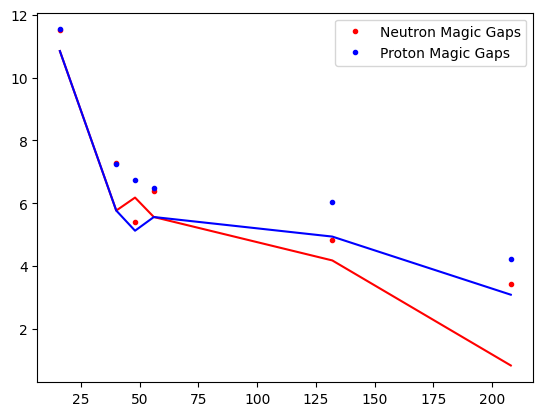

In [151]:
AN = []
AP = []
EN = []
EP = []

FitVal = np.zeros(len(df))
Pval = []
Nval = []
SpaceP = enersorter(space,Pfit.x)
SpaceN = enersorter(space,Nfit.x)
for i in range(0,len(df)):
    args = df.iloc[i]
    if i%2 == 0:
        Num = args[0]-args[1]
        magic = magic_gap_finder(SpaceP,Num)
        FitVal[i] = MHOfreq(*args[:-1])*(SpaceP.iloc[magic][3]-SpaceP.iloc[magic-1][3])
        Pval.append(FitVal[i])
        AP.append(args[0])
        EP.append(args[3])
    else:
        Num = args[1]
        magic = magic_gap_finder(SpaceN,Num)
        FitVal[i] = MHOfreq(*args[:-1])*(SpaceP.iloc[magic][3]-SpaceP.iloc[magic-1][3])
        Nval.append(FitVal[i])
        AN.append(args[0])
        EN.append(args[3])



plt.figure(2)
plt.plot(AN,EN,'r.',label='Neutron Magic Gaps')
plt.plot(AN,Nval,'r')
#plt.plot(dfN['A'],Nval2,'m')
plt.plot(AP,EP,'b.',label='Proton Magic Gaps')
plt.plot(AP,Pval,'b')
#plt.plot(dfP['A'],Pval2,'c')
plt.legend()
plt.show()